In [23]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

# Trade Crops Livestock

In [4]:
crop_trade_df = pd.read_csv('global-food-agriculture-statistics/current_FAO/raw_files/Trade_Crops_Livestock_E_All_Data_(Normalized).csv', encoding='latin1')

In [5]:
crop_trade_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1961,1961,tonnes,0.0,NaN
1,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1962,1962,tonnes,0.0,NaN
2,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1963,1963,tonnes,0.0,NaN
3,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1964,1964,tonnes,0.0,NaN
4,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1965,1965,tonnes,0.0,NaN


In [6]:
crop_trade_df.describe()

,Area Code,Item Code,Element Code,Year Code,Year,Value
count,1.456612e+07,1.456612e+07,1.456612e+07,1.456612e+07,1.456612e+07,1.174878e+07
mean,1.317347e+03,8.093985e+02,5.751319e+03,1.987896e+03,1.987896e+03,3.556790e+05
std,3.696359e+03,6.251936e+02,1.493989e+02,1.534724e+01,1.534724e+01,2.778535e+07
min,1.000000e+00,1.000000e+01,5.610000e+03,1.961000e+03,1.961000e+03,0.000000e+00
25%,7.900000e+01,2.910000e+02,5.610000e+03,1.975000e+03,1.975000e+03,0.000000e+00
50%,1.570000e+02,6.340000e+02,5.622000e+03,1.989000e+03,1.989000e+03,1.490000e+02
75%,2.360000e+02,1.069000e+03,5.910000e+03,2.001000e+03,2.001000e+03,5.342000e+03
max,5.706000e+04,2.077000e+03,5.922000e+03,2.013000e+03,2.013000e+03,1.881876e+10


In [7]:
crop_trade_df.isnull().sum()

Area Code             0
Area                  0
Item Code             0
Item                  0
Element Code          0
Element               0
Year Code             0
Year                  0
Unit                  0
Value           2817340
Flag            5590861
dtype: int64

**The dataset is pretty clean in my opinion. There are two areas where there are missing values, in Flag which is not that important for our purposes and in Value which is more problematic. Something simple we could do is remove the lines where Flag is equal to M**

In [11]:
collections.Counter(crop_trade_df['Area'])

Counter({'Afghanistan': 20617,
         'Albania': 73087,
         'Algeria': 67416,
         'American Samoa': 10971,
         'Angola': 36146,
         'Antigua and Barbuda': 51198,
         'Argentina': 78652,
         'Armenia': 26312,
         'Aruba': 51834,
         'Australia': 81461,
         'Austria': 85118,
         'Azerbaijan': 26884,
         'Bahamas': 57717,
         'Bahrain': 73617,
         'Bangladesh': 63653,
         'Barbados': 71868,
         'Belarus': 31526,
         'Belgium': 24010,
         'Belgium-Luxembourg': 60450,
         'Belize': 55332,
         'Benin': 54855,
         'Bermuda': 46481,
         'Bhutan': 44944,
         'Bolivia (Plurinational State of)': 66886,
         'Bosnia and Herzegovina': 29744,
         'Botswana': 78122,
         'Brazil': 81514,
         'British Virgin Islands': 12614,
         'Brunei Darussalam': 60579,
         'Bulgaria': 83528,
         'Burkina Faso': 59837,
         'Burundi': 46799,
         'Cabo Verde': 5326

In [12]:
collections.Counter(crop_trade_df['Item'])

Counter({'Almonds shelled': 36046,
         'Anise, badian, fennel, coriander': 38873,
         'Apples': 41868,
         'Apricots': 33067,
         'Apricots, dry': 32499,
         'Bananas': 41387,
         'Barley': 36022,
         'Beer of barley': 45344,
         'Beverages, distilled alcoholic': 44854,
         'Beverages, non alcoholic': 45497,
         'Bread': 40872,
         'Butter, cow milk': 44104,
         'Cake, cottonseed': 31196,
         'Cheese, whole cow milk': 44181,
         'Chocolate products nes': 43839,
         'Cigarettes': 45185,
         'Coconuts, desiccated': 37312,
         'Coffee, extracts': 42712,
         'Coffee, green': 44082,
         'Cotton lint': 41174,
         'Cottonseed': 33372,
         'Cream fresh': 38513,
         'Crude materials': 42712,
         'Dates': 37596,
         'Eggs, hen, in shell': 42500,
         'Fat, nes, prepared': 39469,
         'Fatty acids': 38436,
         'Figs': 29985,
         'Figs dried': 28996,
         'F

In [13]:
collections.Counter(crop_trade_df['Element'])

Counter({'Export Quantity': 3193617,
         'Export Value': 3369511,
         'Import Quantity': 3911840,
         'Import Value': 4091151})

**What is the metric ? How is the value mesured ?**

In [14]:
collections.Counter(crop_trade_df['Flag'])

Counter({nan: 5590861,
         '*': 357593,
         'F': 642473,
         'R': 202335,
         'M': 2402557,
         'A': 5370300})

1. 'star' : **Unofficial figure** 
2. 'F' : **FAO estimate**
3. 'R' : **Estimated data using trading partners database**
4. 'M' : **Data not available**
5. 'A' : **Aggregate, may include official, semi-official, estimated or calculated data**


**Two different metrics to measure the exchanges: 1000 US\$ and tonnes**

In [83]:
np.unique(crop_trade_df['Unit'])

array(['1000 US$', 'tonnes'], dtype=object)

In [63]:
crop_trade_df[(crop_trade_df['Area']  == 'Afghanistan') & (crop_trade_df['Element']  == 'Export Quantity') & (crop_trade_df['Item']  == 'Anise, badian, fennel, coriander')]



,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
106,2,Afghanistan,711,"Anise, badian, fennel, coriander",5910,Export Quantity,1961,1961,tonnes,NaN,M
107,2,Afghanistan,711,"Anise, badian, fennel, coriander",5910,Export Quantity,1962,1962,tonnes,NaN,M
108,2,Afghanistan,711,"Anise, badian, fennel, coriander",5910,Export Quantity,1963,1963,tonnes,NaN,M
109,2,Afghanistan,711,"Anise, badian, fennel, coriander",5910,Export Quantity,1964,1964,tonnes,NaN,M
110,2,Afghanistan,711,"Anise, badian, fennel, coriander",5910,Export Quantity,1965,1965,tonnes,NaN,M
111,2,Afghanistan,711,"Anise, badian, fennel, coriander",5910,Export Quantity,1966,1966,tonnes,NaN,M
112,2,Afghanistan,711,"Anise, badian, fennel, coriander",5910,Export Quantity,1967,1967,tonnes,NaN,M
113,2,Afghanistan,711,"Anise, badian, fennel, coriander",5910,Export Quantity,1968,1968,tonnes,NaN,M
114,2,Afghanistan,711,"Anise, badian, fennel, coriander",5910,Export Quantity,1969,1969,tonnes,NaN,M
115,2,Afghanistan,711,"Anise, badian, fennel, coriander",5910,Export Quantity,1970,1970,tonnes,NaN,M


In [78]:
def crop_trade_draw_time_serie(area, element, item):
    
    dataframe = crop_trade_df[(crop_trade_df['Area']  == area) & (crop_trade_df['Element']  == element) & (crop_trade_df['Item'] == item)]
    
    fig= plt.figure(figsize=(15,10))

    fig.suptitle('Time Serie: '+ element + ' of ' +item + ' in '+area + ' from ' + str(dataframe['Year'][dataframe['Value'].first_valid_index()]) + ' until ' + str(dataframe['Year'][dataframe['Value'].last_valid_index()]) )
    sns.set()
    sns.lineplot(x="Year", y="Value", data=dataframe)
    
    if len(np.unique(dataframe['Unit']))>1:
        print("Careful! There are more than one metric to measure the value.")
        
    plt.ylabel(dataframe['Unit'].iloc[0])
    
    
    
    
    
    

**It would be nice to plot nan values with special color, as for now they are not plotted.**

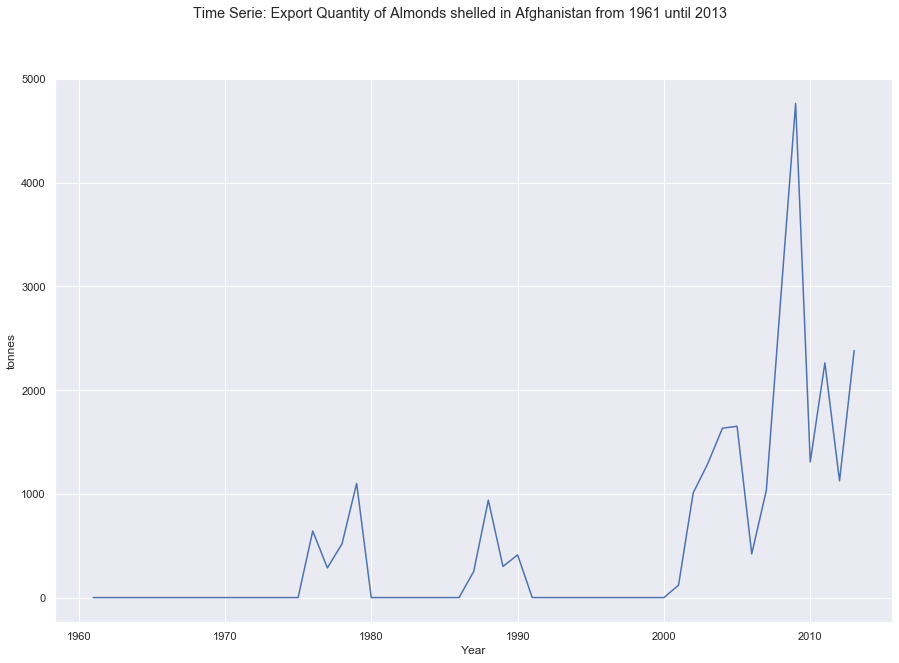

In [79]:
crop_trade_draw_time_serie('Afghanistan', 'Export Quantity', 'Almonds shelled' )

In [84]:
np.unique(crop_trade_df[(crop_trade_df['Area']  == 'Switzerland') & (crop_trade_df['Element']  == 'Export Quantity')]['Item'])



array(['Alfalfa meal and pellets', 'Almonds shelled',
       'Animal Oil+Fat+Grs', 'Animal Vegetable Oil', 'Animal fats',
       'Anise, badian, fennel, coriander', 'Apples', 'Apricots',
       'Apricots, dry', 'Artichokes', 'Asparagus', 'Avocados',
       'Bacon and ham', 'Bananas', 'Bananas and plantains', 'Barley',
       'Barley, pearled', 'Beans, dry', 'Beans, green', 'Beer',
       'Beer of barley', 'Beeswax', 'Beet pulp', 'Beverages',
       'Beverages, distilled alcoholic', 'Beverages, non alcoholic',
       'Bovine Meat', 'Bran, maize', 'Bran, wheat',
       'Brazil nuts, shelled', 'Bread', 'Broad beans, horse beans, dry',
       'Buckwheat', 'Butter', 'Butter, cow milk',
       'Buttermilk, curdled, acidified milk',
       'Cabbages and other brassicas', 'Cake, copra', 'Cake, cottonseed',
       'Cake, groundnuts', 'Cake, linseed', 'Cake, palm kernel',
       'Cake, rapeseed', 'Cake, soybeans', 'Cake, sunflower',
       'Canary seed', 'Canned Meat nes', 'Carrots and turnips',

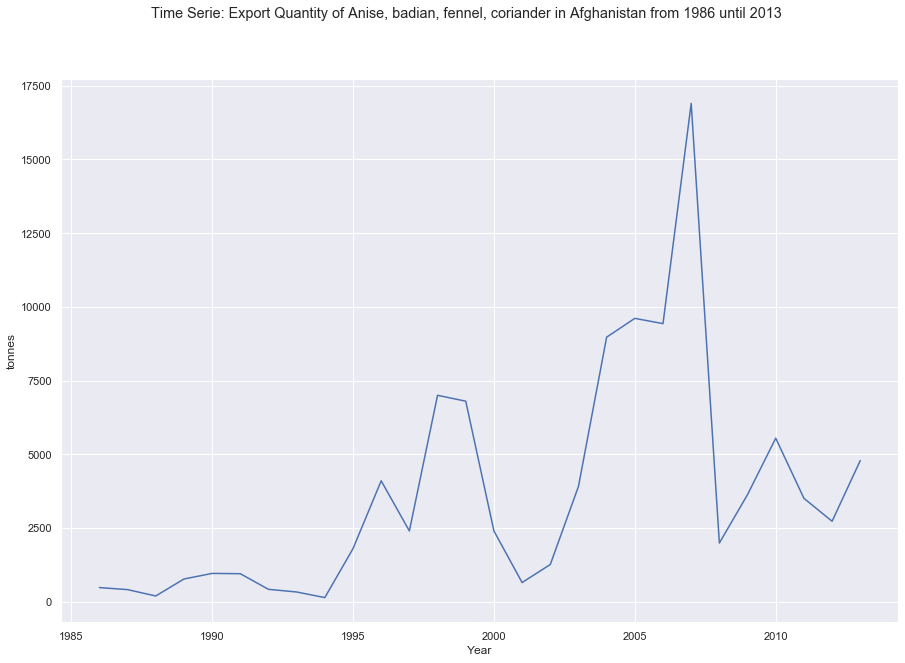

In [81]:
crop_trade_draw_time_serie('Afghanistan', 'Export Quantity', 'Anise, badian, fennel, coriander' )

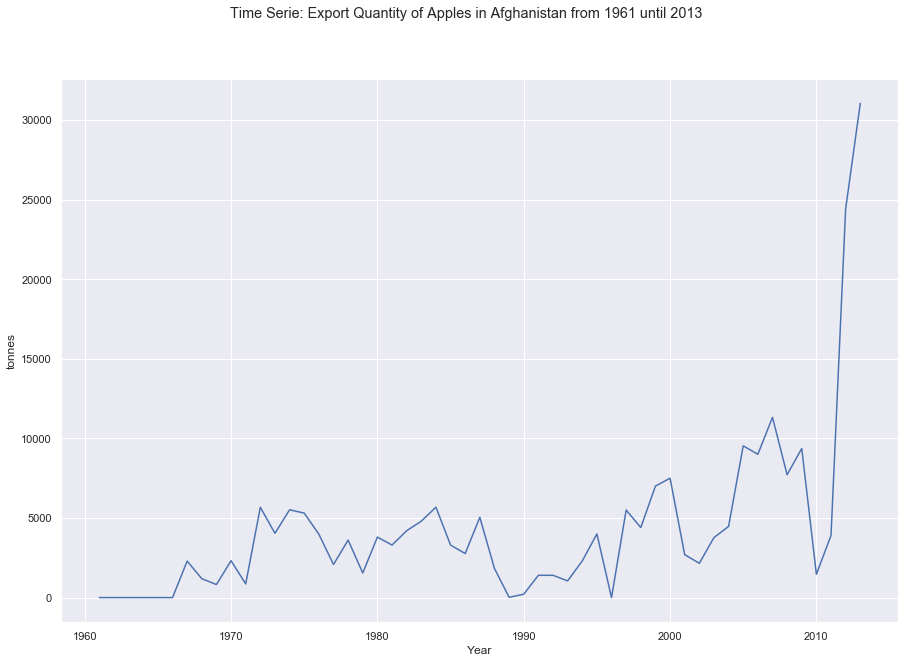

In [82]:
crop_trade_draw_time_serie('Afghanistan', 'Export Quantity', 'Apples' )

# Trade Live Animals

In [85]:
live_animal_trad_df = pd.read_csv('/Users/paulpro/Documents/EPFL/MA3/ADA/Project/global-food-agriculture-statistics/current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv', encoding = 'latin')

In [86]:
live_animal_trad_df

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,866,Cattle,5608,Import Quantity,1961,1961,Head,NaN,M
1,2,Afghanistan,866,Cattle,5608,Import Quantity,1962,1962,Head,NaN,M
2,2,Afghanistan,866,Cattle,5608,Import Quantity,1963,1963,Head,NaN,M
3,2,Afghanistan,866,Cattle,5608,Import Quantity,1964,1964,Head,NaN,M
4,2,Afghanistan,866,Cattle,5608,Import Quantity,1965,1965,Head,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...
662953,5817,Net Food Importing Developing Countries,1922,Sheep and Goats,5922,Export Value,2009,2009,1000 US$,456293.0,A
662954,5817,Net Food Importing Developing Countries,1922,Sheep and Goats,5922,Export Value,2010,2010,1000 US$,421311.0,A
662955,5817,Net Food Importing Developing Countries,1922,Sheep and Goats,5922,Export Value,2011,2011,1000 US$,649321.0,A
662956,5817,Net Food Importing Developing Countries,1922,Sheep and Goats,5922,Export Value,2012,2012,1000 US$,778317.0,A


In [87]:
live_animal_trad_df.isnull().sum()

Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value           135190
Flag            203064
dtype: int64

**We could drop every rows where Value is Nan. It seems impossible to make predicition for such Time Series with this much missing values.**

In [91]:
live_animal_trad_df[live_animal_trad_df['Flag']!='M'][live_animal_trad_df.Value.isnull()]

/Users/paulpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
636,2,Afghanistan,1921,"Bovine, Animals",5608,Import Quantity,1961,1961,Head,NaN,A
637,2,Afghanistan,1921,"Bovine, Animals",5608,Import Quantity,1962,1962,Head,NaN,A
638,2,Afghanistan,1921,"Bovine, Animals",5608,Import Quantity,1963,1963,Head,NaN,A
639,2,Afghanistan,1921,"Bovine, Animals",5608,Import Quantity,1964,1964,Head,NaN,A
640,2,Afghanistan,1921,"Bovine, Animals",5608,Import Quantity,1965,1965,Head,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...
659772,5817,Net Food Importing Developing Countries,1157,"Camelids, other",5922,Export Value,2008,2008,1000 US$,NaN,A
659773,5817,Net Food Importing Developing Countries,1157,"Camelids, other",5922,Export Value,2009,2009,1000 US$,NaN,A
659774,5817,Net Food Importing Developing Countries,1157,"Camelids, other",5922,Export Value,2010,2010,1000 US$,NaN,A
659775,5817,Net Food Importing Developing Countries,1157,"Camelids, other",5922,Export Value,2011,2011,1000 US$,NaN,A
